In [121]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 1. 첫번째 데이터 진행 (데이터 수집 기간: 2007-01-01 ~ 2012-12-01)

In [122]:
df = pd.read_csv('data_1.csv')

df

,date,kosave,kosave_quant,kosave_amt,bc,ar,unsoldapt,tr_bond,loan_apt,cd,...,termdepo,interrate_call,interrate_kb,cpi_jeon,cpi_total,ppi_realestate,ppi_buildlease,cci,cli,SPI
0,2007-01-01,1379.25,192731575,2582501187,112303.8,1780.0,697,4.97,8.12,4.92,...,449295.9,4.63,4.50,75.314,77.573,84.80,89.04,68.2,72.0,75.32
1,2007-02-01,1434.89,230584554,3353641271,114057.2,2019.1,590,4.91,11.67,4.95,...,451327.1,4.60,4.50,75.536,77.725,84.88,89.21,68.7,72.3,75.21
2,2007-03-01,1431.62,276749496,3149139880,117768.3,2492.0,687,4.79,7.88,4.94,...,452615.8,4.60,4.50,75.683,77.878,85.04,89.39,69.5,72.5,75.92
3,2007-04-01,1517.12,373783291,4472297898,116494.6,2590.4,685,4.94,9.63,4.95,...,456907.0,4.69,4.50,75.904,78.031,85.31,89.56,70.3,72.8,75.36
4,2007-05-01,1614.94,416322121,5060726750,119064.5,2475.5,704,5.10,8.22,5.04,...,461735.9,4.61,4.50,76.126,78.259,85.40,89.65,70.9,73.1,74.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2012-08-01,1918.91,445579924,4366251206,148347.6,1702.5,3847,2.83,513.08,3.19,...,884231.5,3.00,3.00,90.263,92.052,94.98,97.66,92.6,87.9,75.39
68,2012-09-01,1961.29,753320375,5216919644,148063.0,1675.0,3754,2.81,460.60,3.14,...,883288.8,2.99,3.00,90.427,92.187,94.67,97.75,92.9,88.0,75.10
69,2012-10-01,1942.19,482695674,4305597713,147283.7,1668.8,3700,2.78,593.27,2.93,...,879969.0,2.80,2.75,90.673,92.398,94.87,97.79,92.7,88.2,75.01
70,2012-11-01,1904.70,447668476,4332995180,150213.8,1653.2,3594,2.80,895.80,2.85,...,878923.0,2.75,2.75,90.920,92.659,94.79,97.88,92.8,88.5,74.88


In [123]:
nCar = df.shape[0] # 데이터 개수
nVar = df.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar: 72 nVar: 24


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              72 non-null     object 
 1   kosave            72 non-null     float64
 2   kosave_quant      72 non-null     int64  
 3   kosave_amt        72 non-null     int64  
 4   bc                72 non-null     float64
 5   ar                72 non-null     float64
 6   unsoldapt         72 non-null     int64  
 7   tr_bond           72 non-null     float64
 8   loan_apt          72 non-null     float64
 9   cd                72 non-null     float64
 10  houseloan_county  72 non-null     float64
 11  houseloan_seoul   72 non-null     float64
 12  cash_cur          72 non-null     float64
 13  deli_ratio        72 non-null     float64
 14  termdepo          72 non-null     float64
 15  interrate_call    72 non-null     float64
 16  interrate_kb      72 non-null     float64
 17 

In [125]:
# df.drop('Unnamed: 0', axis=1, inplace=True)
# df.head()

In [126]:
df = df.set_index('date') # date를 인덱스로 지정 
df.head()

,kosave,kosave_quant,kosave_amt,bc,ar,unsoldapt,tr_bond,loan_apt,cd,houseloan_county,...,termdepo,interrate_call,interrate_kb,cpi_jeon,cpi_total,ppi_realestate,ppi_buildlease,cci,cli,SPI
date,,,,,,,,,,,,,,,,,,,,,
2007-01-01,1379.25,192731575,2582501187,112303.8,1780.0,697,4.97,8.12,4.92,143560.4,...,449295.9,4.63,4.5,75.314,77.573,84.80,89.04,68.2,72.0,75.32
2007-02-01,1434.89,230584554,3353641271,114057.2,2019.1,590,4.91,11.67,4.95,144021.6,...,451327.1,4.60,4.5,75.536,77.725,84.88,89.21,68.7,72.3,75.21
2007-03-01,1431.62,276749496,3149139880,117768.3,2492.0,687,4.79,7.88,4.94,143788.4,...,452615.8,4.60,4.5,75.683,77.878,85.04,89.39,69.5,72.5,75.92
2007-04-01,1517.12,373783291,4472297898,116494.6,2590.4,685,4.94,9.63,4.95,144060.0,...,456907.0,4.69,4.5,75.904,78.031,85.31,89.56,70.3,72.8,75.36
2007-05-01,1614.94,416322121,5060726750,119064.5,2475.5,704,5.10,8.22,5.04,143882.3,...,461735.9,4.61,4.5,76.126,78.259,85.40,89.65,70.9,73.1,74.34


## - test 데이터 분할


데이터 분할 train_test_split 사용

In [127]:
from sklearn.model_selection import train_test_split

feature_columns = list(df.columns.difference(['SPI'])) # target을 제외한 모든 행
X = df[feature_columns] # 설명변수
y = df['SPI'] # 타겟변수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(50, 22) (22, 22) (50,) (22,)


In [128]:
X_train.head()

,ar,bc,cash_cur,cci,cd,cli,cpi_jeon,cpi_total,deli_ratio,houseloan_county,...,interrate_kb,kosave,kosave_amt,kosave_quant,loan_apt,ppi_buildlease,ppi_realestate,termdepo,tr_bond,unsoldapt
date,,,,,,,,,,,,,,,,,,,,,
2007-01-01,1780.0,112303.8,20677.7,68.2,4.92,72.0,75.314,77.573,0.8,143560.4,...,4.5,1379.25,2582501187,192731575,8.12,89.04,84.80,449295.9,4.97,697
2007-02-01,2019.1,114057.2,20690.0,68.7,4.95,72.3,75.536,77.725,0.9,144021.6,...,4.5,1434.89,3353641271,230584554,11.67,89.21,84.88,451327.1,4.91,590
2007-03-01,2492.0,117768.3,21296.6,69.5,4.94,72.5,75.683,77.878,0.8,143788.4,...,4.5,1431.62,3149139880,276749496,7.88,89.39,85.04,452615.8,4.79,687
2007-04-01,2590.4,116494.6,20923.8,70.3,4.95,72.8,75.904,78.031,0.8,144060.0,...,4.5,1517.12,4472297898,373783291,9.63,89.56,85.31,456907.0,4.94,685
2007-05-01,2475.5,119064.5,20833.0,70.9,5.04,73.1,76.126,78.259,0.9,143882.3,...,4.5,1614.94,5060726750,416322121,8.22,89.65,85.40,461735.9,5.10,704


# 1. Gradient Boosting Regression

In [129]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

kf = KFold(n_splits=10)

# Gradient Boosting Regression 모델 선정
from inspect import signature
signature(GradientBoostingRegressor)
# help(GradientBoostingRegressor)
# help(GridSearchCV)

<Signature (*, loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)>

In [130]:
from sklearn import ensemble

# 파라미터 튜닝 (GridSearchCV)

# standard_scaler = preprocessing.StandardScaler()
# train_x_scaled = standard_scaler.fit_transform(X_train)

## Decision trees and ensemble methods do not require feature scaling

# kf = KFold(n_splits=10)
# gbr = ensemble.GradientBoostingRegressor()

# param_grid={'n_estimators':[100, 200, 300, 500], 'learning_rate': [0.1,0.05,0.02], 
#             'max_depth':[2, 3, 4, 5, 6, 7], 'min_samples_leaf':[2, 3, 4, 5, 6, 7, 8, 9], 'loss': ['ls', 'lad', 'huber', 'quantile']}
# grid_sv = GridSearchCV(gbr, cv=kf, param_grid=param_grid, scoring='neg_mean_squared_error')
# grid_sv.fit(X_train, y_train )
# print("Best 파라미터 :", grid_sv.best_params_)

GridSearchCV를 통한 Best 파라미터 출력 : 

 {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 500}

In [131]:
# params = grid_sv.best_params_

# reg = ensemble.GradientBoostingRegressor(**params)
# reg.fit(X_train, y_train)

# mse = mean_squared_error(y_test, reg.predict(X_test))
# print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

## -GBM 모델 평가 수행 

In [132]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

reg = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, min_samples_leaf=2, 
                                max_depth=5, random_state=30, loss='lad').fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
score = reg.score(X_train, y_train)
rmse = np.sqrt(mse.mean())
print("score: %0.4f" % (score))
print("MSE: %0.4f" % (mse))
print("RMSE: %0.4f" % (rmse))

score: 0.9998
MSE: 21.5361
RMSE: 4.6407


In [133]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

mae =  mean_absolute_error(y_test, reg.predict(X_test))
mse = mean_squared_error(y_test, reg.predict(X_test))
rmse = np.sqrt(mse)
r2 = r2_score(y_test, reg.predict(X_test))


print("R2: %0.4f" % (r2))
print("MAE: %0.4f" % (mae))
print("RMSE: %0.4f" % (rmse))

R2: -1.5980
MAE: 3.9837
RMSE: 4.6407


## -모델 예측 결과 비교

In [134]:
reg = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, min_samples_leaf=2, 
                                max_depth=5, random_state=30, loss='lad')

gbm = reg.fit(X_train, y_train )

# 훈련 예측
y_pred_train = gbm.predict(X_train).reshape(-1,1)
y_pred_train = pd.DataFrame(y_pred_train)

train_set_predict = pd.DataFrame(y_train)
train_set_predict['predict'] = y_pred_train.values
# train_set_predict['predict'] = y_pred_train
train_set_predict.rename(columns={'SPI':'true'}, inplace=True)
train_set_predict.head(10)

,true,predict
date,,
2007-01-01,75.32,75.320091
2007-02-01,75.21,75.207400
2007-03-01,75.92,75.920022
2007-04-01,75.36,75.359999
2007-05-01,74.34,74.340138
2007-06-01,75.93,75.930025
2007-07-01,76.60,76.600270
2007-08-01,77.08,77.080039
2007-09-01,77.22,77.213546


In [135]:
# 검증 예측
y_pred = gbm.predict(X_test)

vaild_set_predict = pd.DataFrame(y_test)
vaild_set_predict['predict'] = y_pred
vaild_set_predict.rename(columns = {'SPI':'true'}, inplace=True)
vaild_set_predict.head(15)

,true,predict
date,,
2011-03-01,83.35,83.073763
2011-04-01,82.78,83.177111
2011-05-01,82.20,83.279075
2011-06-01,81.70,83.258123
2011-07-01,81.77,83.251545
2011-08-01,81.93,83.476514
2011-09-01,81.76,83.460421
2011-10-01,81.15,83.454563
2011-11-01,80.43,83.488015


## -시각화

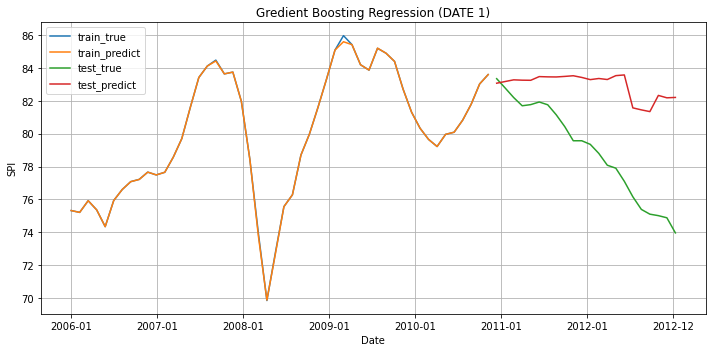

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))
grid = fig.add_subplot(1,1,1)
grid.plot(train_set_predict['true'], label='train_true')
grid.plot(train_set_predict['predict'], label='train_predict')
grid.plot(vaild_set_predict['true'], label='test_true')
grid.plot(vaild_set_predict['predict'], label='test_predict')

grid.set_title('Gredient Boosting Regression (DATE 1)')
plt.xticks(np.arange(0, 80, 10.1),  
           labels=['2006-01', '2007-01', '2008-01', '2009-01', '2010-01', '2011-01', '2012-01','2012-12'])
grid.set_xlabel('Date', fontsize=10)
grid.set_ylabel('SPI',fontsize=10)
# plt.xticks(fontsize=13, rotation=70, )
grid.legend(loc='upper left')
grid.grid(True)

# fig.autofmt_xdate()
plt.tight_layout()

plt.show()

# 2. 두번째 데이터 진행 (데이터 수집 기간: 2013-01-01 ~ 2019-12-01)

In [137]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('data_2.csv')

df

,date,kosave,kosave_quant,kosave_amt,bc,ar,unsoldapt,tr_bond,loan_apt,cd,...,termdepo,interrate_call,interrate_kb,cpi_jeon,cpi_total,ppi_realestate,ppi_buildlease,cci,cli,SPI
0,2013-01-01,1986.10,495654538,4434353297,144956.7,1567.9,3415,2.75,440.43,2.86,...,883814.7,2.76,2.75,91.412,93.090,96.46,98.10,93.3,89.1,74.48
1,2013-02-01,1979.85,384608603,3674863781,146954.1,1558.3,3308,2.70,839.76,2.83,...,883161.2,2.75,2.75,91.658,93.318,98.19,98.22,93.6,89.4,74.78
2,2013-03-01,1990.24,342831485,3830684225,149050.3,1435.2,3168,2.60,940.27,2.81,...,881062.7,2.74,2.75,91.986,93.613,98.22,98.29,94.3,89.7,75.42
3,2013-04-01,1938.88,349743992,4358558297,155254.8,1408.7,3035,2.55,1745.47,2.80,...,877119.5,2.75,2.75,92.315,93.891,98.05,98.16,95.0,90.1,75.64
4,2013-05-01,1974.45,313666214,4220941937,160391.1,1382.2,2908,2.59,1869.58,2.72,...,874704.4,2.55,2.50,92.561,94.102,98.57,98.22,95.3,90.4,75.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2019-08-01,1944.24,498673,4662803,216662.0,299.6,205,1.16,14792.41,1.49,...,1176732.9,1.51,1.50,110.450,106.040,108.50,103.09,112.6,115.7,122.84
80,2019-09-01,2045.21,453725,4520648,222503.4,293.8,207,1.29,17763.43,1.54,...,1186785.6,1.52,1.50,110.490,106.060,108.37,103.24,112.5,116.1,124.18
81,2019-10-01,2065.75,423066,4421096,222908.9,288.0,191,1.36,35599.44,1.46,...,1201916.8,1.36,1.25,110.560,106.140,108.76,103.28,112.2,116.8,126.02
82,2019-11-01,2128.79,511317,5317098,223880.3,273.8,176,1.49,69418.23,1.52,...,1213871.8,1.28,1.25,110.620,106.200,108.72,103.27,112.2,117.5,128.35


In [138]:
nCar = df.shape[0] # 데이터 개수
nVar = df.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar: 84 nVar: 24


In [139]:
df = df.set_index('date') # date를 인덱스로 지정 
df.head()

,kosave,kosave_quant,kosave_amt,bc,ar,unsoldapt,tr_bond,loan_apt,cd,houseloan_county,...,termdepo,interrate_call,interrate_kb,cpi_jeon,cpi_total,ppi_realestate,ppi_buildlease,cci,cli,SPI
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1986.10,495654538,4434353297,144956.7,1567.9,3415,2.75,440.43,2.86,200072.2,...,883814.7,2.76,2.75,91.412,93.090,96.46,98.10,93.3,89.1,74.48
2013-02-01,1979.85,384608603,3674863781,146954.1,1558.3,3308,2.70,839.76,2.83,199441.8,...,883161.2,2.75,2.75,91.658,93.318,98.19,98.22,93.6,89.4,74.78
2013-03-01,1990.24,342831485,3830684225,149050.3,1435.2,3168,2.60,940.27,2.81,199090.2,...,881062.7,2.74,2.75,91.986,93.613,98.22,98.29,94.3,89.7,75.42
2013-04-01,1938.88,349743992,4358558297,155254.8,1408.7,3035,2.55,1745.47,2.80,199239.5,...,877119.5,2.75,2.75,92.315,93.891,98.05,98.16,95.0,90.1,75.64
2013-05-01,1974.45,313666214,4220941937,160391.1,1382.2,2908,2.59,1869.58,2.72,200043.2,...,874704.4,2.55,2.50,92.561,94.102,98.57,98.22,95.3,90.4,75.73


## - test 데이터 분할


데이터 분할 train_test_split 사용

In [140]:
from sklearn.model_selection import train_test_split

feature_columns = list(df.columns.difference(['SPI'])) # target을 제외한 모든 행
X = df[feature_columns] # 설명변수
y = df['SPI'] # 타겟변수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(58, 22) (26, 22) (58,) (26,)


## - 기간 2, Gradient Boosting Regression 진행

In [141]:
# # 파라미터 튜닝 (GridSearchCV)
# from sklearn import ensemble
# from sklearn.model_selection import KFold

# # standard_scaler = preprocessing.StandardScaler()
# # train_x_scaled = standard_scaler.fit_transform(X_train)

# kf = KFold(n_splits=10)
# gbr = ensemble.GradientBoostingRegressor()

# param_grid={'n_estimators':[100, 200, 300, 500], 'learning_rate': [0.1,0.05,0.02], 
#             'max_depth':[2, 3, 4, 5, 6, 7], 'min_samples_leaf':[2, 3, 4, 5, 6, 7, 8, 9], 'loss': ['ls', 'lad', 'huber', 'quantile']}
# grid_sv = GridSearchCV(gbr, cv=kf, param_grid=param_grid, scoring='neg_mean_squared_error')
# grid_sv.fit(X_train, y_train )
# print("Best 파라미터 :", grid_sv.best_params_)

Best 파라미터 : 
    
    {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 500}

In [142]:
# params = grid_sv.best_params_

# reg = ensemble.GradientBoostingRegressor(**params)
# reg.fit(train_x_scaled, y_train)

# mse = mean_squared_error(y_test, reg.predict(X_test))
# print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

In [143]:
reg = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, min_samples_leaf=3, 
                                max_depth=2, random_state=30, loss='ls').fit(X_train, y_train)

## - GBM 모델 평가 수행 

In [144]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

reg = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, min_samples_leaf=3, 
                                max_depth=2, random_state=30, loss='ls').fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
score = reg.score(X_train, y_train)
rmse = np.sqrt(mse.mean())
print("score: %0.4f" % (score))
print("MSE: %0.4f" % (mse))
print("RMSE: %0.4f" % (rmse))

score: 1.0000
MSE: 401.1969
RMSE: 20.0299


In [145]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

mae =  mean_absolute_error(y_test, reg.predict(X_test))
mse = mean_squared_error(y_test, reg.predict(X_test))
rmse = np.sqrt(mse)
r2 = r2_score(y_test, reg.predict(X_test))


print("R2: %0.4f" % (r2))
print("MAE: %0.4f" % (mae))
print("RMSE: %0.4f" % (rmse))

R2: -4.8095
MAE: 18.0640
RMSE: 20.0299


## -모델 예측 결과 비교

In [146]:
reg = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, min_samples_leaf=3, 
                                max_depth=2, random_state=30, loss='ls')

gbm = reg.fit(X_train, y_train )

# 훈련 예측
y_pred_train = gbm.predict(X_train).reshape(-1,1)
y_pred_train = pd.DataFrame(y_pred_train)

train_set_predict = pd.DataFrame(y_train)
train_set_predict['predict'] = y_pred_train.values
# train_set_predict['predict'] = y_pred_train
train_set_predict.rename(columns={'SPI':'true'}, inplace=True)
train_set_predict.head(10)

,true,predict
date,,
2013-01-01,74.48,74.484778
2013-02-01,74.78,74.779434
2013-03-01,75.42,75.417311
2013-04-01,75.64,75.639004
2013-05-01,75.73,75.729479
2013-06-01,75.36,75.358779
2013-07-01,75.30,75.300218
2013-08-01,75.55,75.550414
2013-09-01,76.36,76.359739


In [147]:
y_pred = gbm.predict(X_test)

# 검증 예측
vaild_set_predict = pd.DataFrame(y_test)
# vaild_set_predict['predict'] = y_pred.values
vaild_set_predict['predict'] = y_pred
vaild_set_predict.rename(columns = {'SPI':'true'}, inplace=True)
vaild_set_predict.head(15)

,true,predict
date,,
2017-11-01,100.00,99.032100
2017-12-01,100.90,97.838108
2018-01-01,102.94,97.813331
2018-02-01,104.85,97.769379
2018-03-01,106.05,97.773432
2018-04-01,107.60,97.743561
2018-05-01,108.00,97.743712
2018-06-01,108.69,97.745790
2018-07-01,110.12,97.529522


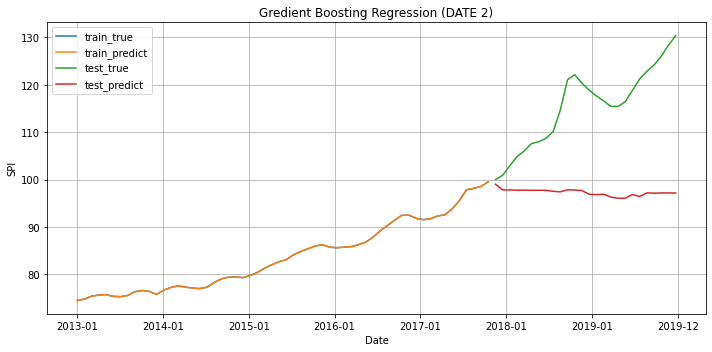

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))
grid = fig.add_subplot(1,1,1)
grid.plot(train_set_predict['true'], label='train_true')
grid.plot(train_set_predict['predict'], label='train_predict')
grid.plot(vaild_set_predict['true'], label='test_true')
grid.plot(vaild_set_predict['predict'], label='test_predict')

grid.set_title('Gredient Boosting Regression (DATE 2)')
plt.xticks(np.arange(0, 95, 11.9),  
           labels=['2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01','2019-12'])
grid.set_xlabel('Date', fontsize=10)
grid.set_ylabel('SPI',fontsize=10)
# plt.xticks(fontsize=13, rotation=70, )
grid.legend(loc='upper left')
grid.grid(True)

# fig.autofmt_xdate()
plt.tight_layout()

plt.show()